In [1]:
%%bash

pip install -q kaggle
mkdir -p ~/.kaggle
cp drive/MyDrive/kaggle.json ~/.kaggle/
chmod 600 /root/.kaggle/kaggle.json
kaggle datasets download -d dhanushnarayananr/credit-card-fraud
unzip -qq credit-card-fraud.zip

100%|██████████| 28.9M/28.9M [00:00<00:00, 68.8MB/s]


In [3]:
!pip install xgboost==1.7.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 5.4 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [4]:
import xgboost 
xgboost.__version__

'1.7.1'

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [6]:
df = pd.read_csv("card_transdata.csv")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [7]:
np.max(df["distance_from_home"])

10632.723672241103

In [8]:
np.min(df["distance_from_home"])

0.0048743850667442

In [11]:
np.mean(df["distance_from_home"][df["fraud"] == 1.0])

66.26187633436918

In [12]:
df["fraud"].unique()

array([0., 1.])

Text(0, 0.5, 'Distance from home')

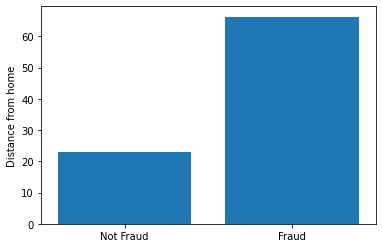

In [19]:
_, ax = plt.subplots()
ax.bar(df["fraud"].unique().astype("int64"), [np.mean(df["distance_from_home"][df["fraud"] == 0.0]), np.mean(df["distance_from_home"][df["fraud"] == 1.0])])
ax.set_xlim([-0.5, 1.5])
ax.set_xticks([0, 1])
ax.set_xticklabels(["Not Fraud", "Fraud"])
plt.ylabel("Distance from home")

Text(0, 0.5, 'Distance from last transaction')

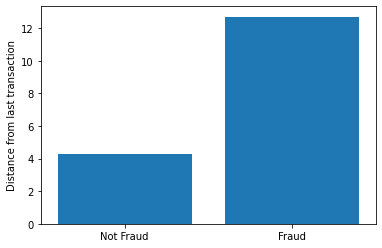

In [20]:
_, ax = plt.subplots()
ax.bar(df["fraud"].unique().astype("int64"), [np.mean(df["distance_from_last_transaction"][df["fraud"] == 0.0]), np.mean(df["distance_from_last_transaction"][df["fraud"] == 1.0])])
ax.set_xlim([-0.5, 1.5])
ax.set_xticks([0, 1])
ax.set_xticklabels(["Not Fraud", "Fraud"])
plt.ylabel("Distance from last transaction")

Text(0, 0.5, 'Ration to median purchase price')

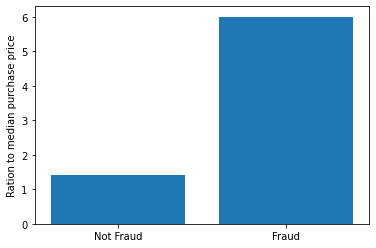

In [21]:
_, ax = plt.subplots()
ax.bar(df["fraud"].unique().astype("int64"), [np.mean(df["ratio_to_median_purchase_price"][df["fraud"] == 0.0]), np.mean(df["ratio_to_median_purchase_price"][df["fraud"] == 1.0])])
ax.set_xlim([-0.5, 1.5])
ax.set_xticks([0, 1])
ax.set_xticklabels(["Not Fraud", "Fraud"])
plt.ylabel("Ration to median purchase price")

In [22]:
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [23]:
X = df.drop("fraud", axis=1)
y = df["fraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
xgclf = XGBClassifier()
rclf = RandomForestClassifier()

In [25]:
xgclf.fit(X_train.values, y_train.values)
xgclf.score(X_test.values, y_test.values)

0.999965

In [26]:
rclf.fit(X_train.values, y_train.values)
rclf.score(X_test.values, y_test.values)

0.99998

In [29]:
xgclf.predict([X_test.values[43]])

array([0])